In [2]:
import pandas as pd

#### 열 단위 데이터 프레임 결합

In [6]:
# 인덱스가 지정되지 않은 첫 번째 셈플 데이터 준비

학생정보 = pd.DataFrame({
    "이름": ["철수", "영희", "호영"], 
    "학년": [1, 1, 3], 
    "성별": ["남자","여자", "남자"]
})
학생정보

,이름,학년,성별
0,철수,1,남자
1,영희,1,여자
2,호영,3,남자


In [8]:
# 인덱스가 지정되지않은 두번째 셈플데이터 준비

성적 = pd.DataFrame({
    "이름": ["영희", "민수", "수현"], 
    "국어": [88, 92, 63],
    "영어": [90, 70, 60],
    "수학": [62, None, 31],
    "과학": [72, None, 70]
})
성적

,이름,국어,영어,수학,과학
0,영희,88,90,62.0,72.0
1,민수,92,70,NaN,NaN
2,수현,63,60,31.0,70.0


In [11]:
# Inner JOIN

mdf = pd.merge(학생정보, 성적)
mdf

,이름,학년,성별,국어,영어,수학,과학
0,영희,1,여자,88,90,62.0,72.0


In [14]:
# Left JOIN

mdf = pd.merge(학생정보, 성적, how='left')
mdf

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,NaN,NaN,NaN,NaN
1,영희,1,여자,88.0,90.0,62.0,72.0
2,호영,3,남자,NaN,NaN,NaN,NaN


In [17]:
# Right JOIN

mdf = pd.merge(학생정보, 성적, how='right')
mdf

,이름,학년,성별,국어,영어,수학,과학
0,영희,1.0,여자,88,90,62.0,72.0
1,민수,NaN,NaN,92,70,NaN,NaN
2,수현,NaN,NaN,63,60,31.0,70.0


#### 전체 데이터 결합 (Full Outer Join)

In [18]:
mdf = pd.merge(학생정보, 성적, how='outer')
mdf

,이름,학년,성별,국어,영어,수학,과학
0,철수,1.0,남자,NaN,NaN,NaN,NaN
1,영희,1.0,여자,88.0,90.0,62.0,72.0
2,호영,3.0,남자,NaN,NaN,NaN,NaN
3,민수,NaN,NaN,92.0,70.0,NaN,NaN
4,수현,NaN,NaN,63.0,60.0,31.0,70.0


#### 중복되는 데이터가 존재하는 경우의 열단위 병합

In [20]:
# 첫번째 샘플데이터 프레임 생성

df_first = pd.DataFrame({'아이디': ['hello', 'world', 'python', 'hello'], '결재금액': [14000, 13000, 15000, 13000]})
df_first

,아이디,결재금액
0,hello,14000
1,world,13000
2,python,15000
3,hello,13000


In [21]:
# 두번째 샘플데이터 프레임 생성

df_second = pd.DataFrame({'아이디': ['hello', 'python', 'python', 'world'], '적립금': [300, 500, 100, 200]})
df_second

,아이디,적립금
0,hello,300
1,python,500
2,python,100
3,world,200


In [23]:
# 두 데이터 프레임 병합하기

pd.merge(df_first, df_second)

,아이디,결재금액,적립금
0,hello,14000,300
1,hello,13000,300
2,world,13000,200
3,python,15000,500
4,python,15000,100


#### 공통 컬럼이 두개이상 존재하는 경우의 병합

In [24]:
# 첫번째 샘플데이터 생성
df_a = pd.DataFrame({'고객명': ['민수', '수영'],
                  '데이터': ['20000', '100000'],
                  '날짜': ['2018-01-01', '2018-01-01']})
df_a

,고객명,데이터,날짜
0,민수,20000,2018-01-01
1,수영,100000,2018-01-01


In [25]:
# 두번째 샘플데이터 생성

df_b = pd.DataFrame({'고객명': ['민수', '수영'], '데이터': ['21세', '20세']})
df_b

,고객명,데이터
0,민수,21세
1,수영,20세


In [28]:
# 두 샘플데이터 병합

pd.merge(df_a, df_b)

,고객명,데이터,날짜


In [29]:
# on 파라미터를 사용하여 기준열 지정

merge_tmp = pd.merge(df_a, df_b, on=['고객명'])
merge_tmp

,고객명,데이터_x,날짜,데이터_y
0,민수,20000,2018-01-01,21세
1,수영,100000,2018-01-01,20세


In [31]:
# 컬럼이름을 수정 및 인덱스를 지정한 최종결과 만들기

merge_result = merge_tmp.rename(columns={"데이터_x": "금액", "데이터_y": "나이"})
merge_result.set_index('고객명', inplace=True)
merge_result

,금액,날짜,나이
고객명,,,
민수,20000,2018-01-01,21세
수영,100000,2018-01-01,20세


#### 공통 컬럼이 존재하지 않는 경우의 병합

In [33]:
# 첫번째 샘플 데이터 생성

국어점수 = pd.DataFrame({'이름': ['영희', '철수'], '국어': [87, 91]})
국어점수

,이름,국어
0,영희,87
1,철수,91


In [34]:
# 두번째 샘플 데이터 생성

영어점수 = pd.DataFrame({'성명': ['영희', '철수'], '영어': [90, 82]})
영어점수

,성명,영어
0,영희,90
1,철수,82


In [35]:
# 왼쪽의 이름 컬럼과 오른쪽의 성명 컬럼이 같은 데이터를 병합

국어영어 = pd.merge(국어점수, 영어점수, left_on=['이름'], right_on=['성명'])
국어영어

,이름,국어,성명,영어
0,영희,87,영희,90
1,철수,91,철수,82


In [36]:
# 중복되지않는 값을 갖는 성명컬럼은 제거

국어영어.drop('성명', axis=1, inplace=True)
국어영어

,이름,국어,영어
0,영희,87,90
1,철수,91,82


#### 인덱스를 기준으로 병합

In [37]:
# 첫번쨰 샘플데이터 생성

수학점수 = pd.DataFrame({'수학': [90, 82]}, index=['민철', '봉구'])
수학점수

,수학
민철,90
봉구,82


In [39]:
# 두번째 샘플데이터 생성

과학점수 = pd.DataFrame({'과학': [90, 82]}, index=['민철', '철수'])
과학점수

,과학
민철,90
철수,82


In [40]:
# index를 기준으로 병합

수학과학 = pd.merge(수학점수, 과학점수, left_index=True, right_index=True)
수학과학

,수학,과학
민철,90,90


In [41]:
# index가 겹치지 않더라도 병합하도록 how 적용

수학과학 = pd.merge(수학점수, 과학점수, left_index=True, right_index=True, how='outer')
수학과학

,수학,과학
민철,90.0,90.0
봉구,82.0,NaN
철수,NaN,82.0


#### 왼쪽의 인덱스와 오른쪽의 컬럼을 기준으로 병합

In [43]:
# 첫번째 샘플데이터 생성

한국사 = pd.DataFrame({'한국사': [87, 91]}, index=['영희', '철수'])
한국사

,한국사
영희,87
철수,91


In [45]:
# 두번째 샘플데이터 생성
세계사 = pd.DataFrame({'세계사': [90, 82], '이름': ['영희', '철수']})
세계사

,세계사,이름
0,90,영희
1,82,철수


In [47]:
# 왼쪽에서는 인덱스 사용, 오른쪽에서는 이름 사용

역사점수 = pd.merge(한국사, 세계사, left_index=True, right_on=["이름"])
역사점수


,한국사,세계사,이름
0,87,90,영희
1,91,82,철수


In [48]:
역사점수.set_index('이름', inplace=True)
역사점수

,한국사,세계사
이름,,
영희,87,90
철수,91,82


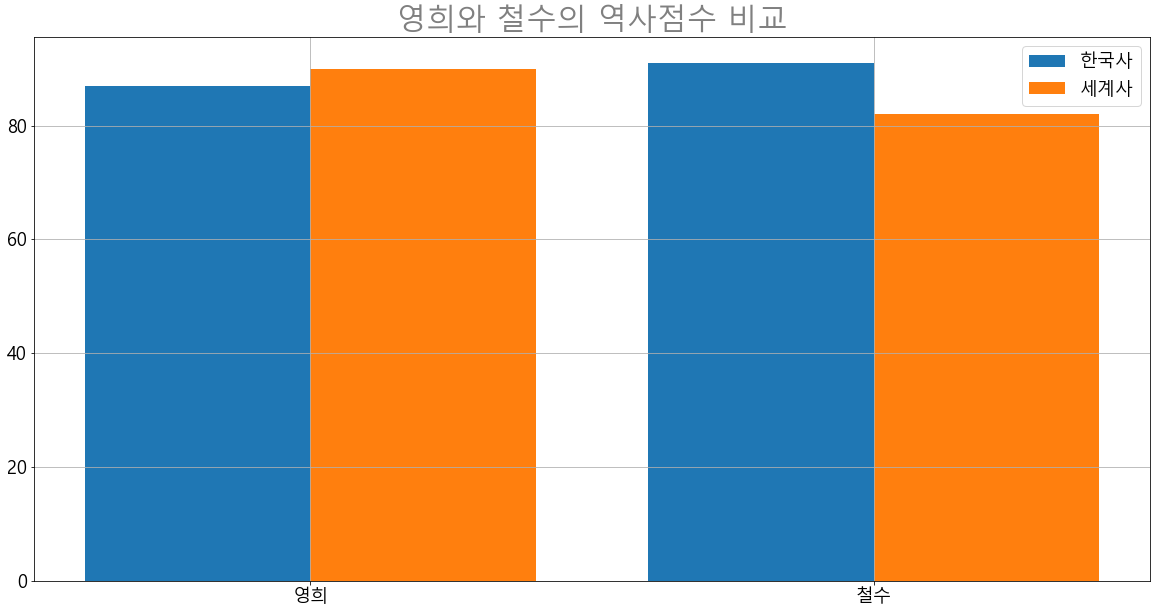

In [50]:
# 결과 데이터 시각화

from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (20, 10)

x = np.array([1, 2])

plt.figure()
plt.bar(x-0.2, 역사점수['한국사'], width=0.4, label='한국사')
plt.bar(x+0.2, 역사점수['세계사'], width=0.4, label='세계사')
plt.xticks(x, 역사점수.index)
plt.legend()
plt.title('영희와 철수의 역사점수 비교', fontsize=30, color='gray')
plt.grid()
plt.show()

### 행 단위 데이터 프레임 병합

In [51]:
df_top = pd.DataFrame({'국어': [90, 82], '수학': [81, 76]}, index=['민철', '철수'])
df_top

,국어,수학
민철,90,81
철수,82,76


In [53]:
df_middle = pd.DataFrame({'국어': [70, 62], '영어': [77, 68]}, index=['영민', '정수'])
df_middle

,국어,영어
영민,70,77
정수,62,68


In [54]:
df_bottom = pd.DataFrame({'영어': [70, 88], '과학': [81, 76]}, index=['민철', '태영'])
df_bottom

,영어,과학
민철,70,81
태영,88,76


In [56]:
# 위에서 생성 데이터프래임 이어붙이기

# df_top에 연결할 대상이 두 개 이상이라면 파라미터를 리스트로 구분.
df_a = df_top.append([df_middle, df_bottom])
df_a

,국어,수학,영어,과학
민철,90.0,81.0,NaN,NaN
철수,82.0,76.0,NaN,NaN
영민,70.0,NaN,77.0,NaN
정수,62.0,NaN,68.0,NaN
민철,NaN,NaN,70.0,81.0
태영,NaN,NaN,88.0,76.0


In [58]:
# 위에서 생성한 데이터프레임 병합

df_b = pd.concat([df_top, df_middle, df_bottom])
df_b

,국어,수학,영어,과학
민철,90.0,81.0,NaN,NaN
철수,82.0,76.0,NaN,NaN
영민,70.0,NaN,77.0,NaN
정수,62.0,NaN,68.0,NaN
민철,NaN,NaN,70.0,81.0
태영,NaN,NaN,88.0,76.0
